In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute

try:
    import pandas_datareader.data as web
except ImportError:
    print("You need to install the pandas_datareader. Run pip install pandas_datareader.")

from sklearn.linear_model import LinearRegression

In [3]:
df = web.DataReader("AAPL", 'stooq')["High"]
df.head()

Date
2021-01-08    132.6300
2021-01-07    131.6300
2021-01-06    131.0499
2021-01-05    131.7400
2021-01-04    133.6116
Name: High, dtype: float64

In [4]:
df_melted = pd.DataFrame({"high": df.copy()})
df_melted["date"] = df_melted.index
df_melted["Symbols"] = "AAPL"

df_melted.head()

,high,date,Symbols
Date,,,
2021-01-08,132.6300,2021-01-08,AAPL
2021-01-07,131.6300,2021-01-07,AAPL
2021-01-06,131.0499,2021-01-06,AAPL
2021-01-05,131.7400,2021-01-05,AAPL
2021-01-04,133.6116,2021-01-04,AAPL


In [5]:
df_rolled = roll_time_series(df_melted, column_id="Symbols", column_sort="date",
                             max_timeshift=20, min_timeshift=5)

Rolling: 100%|██████████| 30/30 [00:03<00:00,  9.10it/s]


In [7]:
df_rolled.head(40)

,high,date,Symbols,id
0,22.943,2016-01-11,AAPL,"(AAPL, 2016-01-19 00:00:00)"
1,23.322,2016-01-12,AAPL,"(AAPL, 2016-01-19 00:00:00)"
2,23.436,2016-01-13,AAPL,"(AAPL, 2016-01-19 00:00:00)"
3,23.274,2016-01-14,AAPL,"(AAPL, 2016-01-19 00:00:00)"
4,22.631,2016-01-15,AAPL,"(AAPL, 2016-01-19 00:00:00)"
5,22.850,2016-01-19,AAPL,"(AAPL, 2016-01-19 00:00:00)"
6,22.943,2016-01-11,AAPL,"(AAPL, 2016-01-20 00:00:00)"
7,23.322,2016-01-12,AAPL,"(AAPL, 2016-01-20 00:00:00)"
8,23.436,2016-01-13,AAPL,"(AAPL, 2016-01-20 00:00:00)"
9,23.274,2016-01-14,AAPL,"(AAPL, 2016-01-20 00:00:00)"


In [8]:
df_rolled[df_rolled["id"] == ("AAPL", pd.to_datetime("2020-07-14"))]

,high,date,Symbols,id
23589,86.116,2020-06-15,AAPL,"(AAPL, 2020-07-14 00:00:00)"
23590,87.988,2020-06-16,AAPL,"(AAPL, 2020-07-14 00:00:00)"
23591,88.537,2020-06-17,AAPL,"(AAPL, 2020-07-14 00:00:00)"
23592,88.050,2020-06-18,AAPL,"(AAPL, 2020-07-14 00:00:00)"
23593,88.827,2020-06-19,AAPL,"(AAPL, 2020-07-14 00:00:00)"
23594,89.548,2020-06-22,AAPL,"(AAPL, 2020-07-14 00:00:00)"
23595,92.768,2020-06-23,AAPL,"(AAPL, 2020-07-14 00:00:00)"
23596,91.873,2020-06-24,AAPL,"(AAPL, 2020-07-14 00:00:00)"
23597,90.928,2020-06-25,AAPL,"(AAPL, 2020-07-14 00:00:00)"
23598,91.008,2020-06-26,AAPL,"(AAPL, 2020-07-14 00:00:00)"


In [9]:
df_melted[(df_melted["date"] <= pd.to_datetime("2020-07-14")) & 
          (df_melted["date"] >= pd.to_datetime("2020-06-15")) & 
          (df_melted["Symbols"] == "AAPL")]

,high,date,Symbols
Date,,,
2020-07-14,96.913,2020-07-14,AAPL
2020-07-13,99.610,2020-07-13,AAPL
2020-07-10,95.643,2020-07-10,AAPL
2020-07-09,95.979,2020-07-09,AAPL
2020-07-08,95.038,2020-07-08,AAPL
2020-07-07,94.322,2020-07-07,AAPL
2020-07-06,93.613,2020-07-06,AAPL
2020-07-02,92.291,2020-07-02,AAPL
2020-07-01,91.517,2020-07-01,AAPL


In [10]:
len(df_melted)

1259

In [11]:
df_rolled["id"].nunique()

1254

In [12]:
df_rolled.groupby("id").size().agg([np.min, np.max])

amin     6
amax    21
dtype: int64

In [ ]:
df_rolled.groupby("id").size().agg([np.min, np.max])

In [13]:
X = extract_features(df_rolled.drop("Symbols", axis=1), 
                     column_id="id", column_sort="date", column_value="high", 
                     impute_function=impute, show_warnings=False)

Feature Extraction: 100%|██████████| 30/30 [00:15<00:00,  1.88it/s]


In [14]:
X.head()

high__variance_larger_than_standard_deviation  \
AAPL 2016-01-19                                            0.0   
     2016-01-20                                            0.0   
     2016-01-21                                            0.0   
     2016-01-22                                            0.0   
     2016-01-25                                            0.0   

                 high__has_duplicate_max  high__has_duplicate_min  \
AAPL 2016-01-19                      0.0                      0.0   
     2016-01-20                      0.0                      0.0   
     2016-01-21                      0.0                      0.0   
     2016-01-22                      0.0                      0.0   
     2016-01-25                      0.0                      0.0   

                 high__has_duplicate  high__sum_values  high__abs_energy  \
AAPL 2016-01-19                  0.0           138.456       3195.506766   
     2016-01-20                  0.0           161.199       3712.750815   
     2016-01-21                  0.0           183.870       4226.725056   
     2016-01-22                  0.0           207.369       4778.928057   
     2016-01-25                  0.0           230.884       5331.883282   

                 high__mean_abs_change  high__mean_change  \
AAPL 2016-01-19               0.303400          -0.018600   
     2016-01-20               0.270667          -0.033333   
     2016-01-21               0.242286          -0.038857   
     2016-01-22               0.315500           0.069500   
     2016-01-25               0.282222           0.063556   

                 high__mean_second_derivative_central  high__median  ...  \
AAPL 2016-01-19                             -0.020000       23.1085  ...   
     2016-01-20                             -0.048600       22.9430  ...   
     2016-01-21                             -0.037583       22.8965  ...   
     2016-01-22                              0.032071       22.9430  ...   
     2016-01-25                             -0.022687       23.1085  ...   

                 high__fourier_entropy__bins_2  high__fourier_entropy__bins_3  \
AAPL 2016-01-19                       0.693147                       1.039721   
     2016-01-20                       0.693147                       1.039721   
     2016-01-21                       0.673012                       1.054920   
     2016-01-22                       0.500402                       0.500402   
     2016-01-25                       0.450561                       0.450561   

                 high__fourier_entropy__bins_5  \
AAPL 2016-01-19                       1.039721   
     2016-01-20                       1.386294   
     2016-01-21                       1.332179   
     2016-01-22                       0.950271   
     2016-01-25                       0.867563   

                 high__fourier_entropy__bins_10  \
AAPL 2016-01-19                        1.039721   
     2016-01-20                        1.386294   
     2016-01-21                        1.609438   
     2016-01-22                        0.950271   
     2016-01-25                        0.867563   

                 high__fourier_entropy__bins_100  \
AAPL 2016-01-19                         1.386294   
     2016-01-20                         1.386294   
     2016-01-21                         1.609438   
     2016-01-22                         1.332179   
     2016-01-25                         1.560710   

                 high__permutation_entropy__dimension_3__tau_1  \
AAPL 2016-01-19                                       1.386294   
     2016-01-20                                       1.609438   
     2016-01-21                                       1.560710   
     2016-01-22                                       1.747868   
     2016-01-25                                       1.732868   

                 high__permutation_entropy__dimension_4__tau_1  \
AAPL 2016-01-19                                      

In [15]:
X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
X.index.name = "last_date"
X.head()

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__fourier_entropy__bins_2,high__fourier_entropy__bins_3,high__fourier_entropy__bins_5,high__fourier_entropy__bins_10,high__fourier_entropy__bins_100,high__permutation_entropy__dimension_3__tau_1,high__permutation_entropy__dimension_4__tau_1,high__permutation_entropy__dimension_5__tau_1,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1
last_date,,,,,,,,,,,,,,,,,,,,,
2016-01-19,0.0,0.0,0.0,0.0,138.456,3195.506766,0.303400,-0.018600,-0.020000,23.1085,...,0.693147,1.039721,1.039721,1.039721,1.386294,1.386294,1.098612,0.693147,-0.000000,2.708050
2016-01-20,0.0,0.0,0.0,0.0,161.199,3712.750815,0.270667,-0.033333,-0.048600,22.9430,...,0.693147,1.039721,1.386294,1.386294,1.386294,1.609438,1.386294,1.098612,0.693147,-0.000000
2016-01-21,0.0,0.0,0.0,0.0,183.870,4226.725056,0.242286,-0.038857,-0.037583,22.8965,...,0.673012,1.054920,1.332179,1.609438,1.609438,1.560710,1.609438,1.386294,1.098612,0.693147
2016-01-22,0.0,0.0,0.0,0.0,207.369,4778.928057,0.315500,0.069500,0.032071,22.9430,...,0.500402,0.500402,0.950271,0.950271,1.332179,1.747868,1.791759,1.609438,1.386294,1.098612
2016-01-25,0.0,0.0,0.0,0.0,230.884,5331.883282,0.282222,0.063556,-0.022687,23.1085,...,0.450561,0.450561,0.867563,0.867563,1.560710,1.732868,1.945910,1.791759,1.609438,1.386294


In [16]:
X.loc['2020-07-14']

high__variance_larger_than_standard_deviation       1.000000
high__has_duplicate_max                             0.000000
high__has_duplicate_min                             0.000000
high__has_duplicate                                 0.000000
high__sum_values                                 1931.966000
                                                    ...     
high__permutation_entropy__dimension_3__tau_1       1.438332
high__permutation_entropy__dimension_4__tau_1       1.955984
high__permutation_entropy__dimension_5__tau_1       2.262386
high__permutation_entropy__dimension_6__tau_1       2.566599
high__permutation_entropy__dimension_7__tau_1       2.615631
Name: 2020-07-14 00:00:00, Length: 779, dtype: float64

In [17]:
y = df_melted.set_index("date").sort_index().high.shift(-1)

In [18]:
y["2020-07-13"], df["2020-07-14"].iloc[0]

(96.913, 96.913)

In [19]:
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

In [20]:
X[:"2018"]

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__fourier_entropy__bins_2,high__fourier_entropy__bins_3,high__fourier_entropy__bins_5,high__fourier_entropy__bins_10,high__fourier_entropy__bins_100,high__permutation_entropy__dimension_3__tau_1,high__permutation_entropy__dimension_4__tau_1,high__permutation_entropy__dimension_5__tau_1,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1
last_date,,,,,,,,,,,,,,,,,,,,,
2016-01-19,0.0,0.0,0.0,0.0,138.456,3195.506766,0.303400,-0.018600,-0.020000,23.1085,...,0.693147,1.039721,1.039721,1.039721,1.386294,1.386294,1.098612,0.693147,-0.000000,2.708050
2016-01-20,0.0,0.0,0.0,0.0,161.199,3712.750815,0.270667,-0.033333,-0.048600,22.9430,...,0.693147,1.039721,1.386294,1.386294,1.386294,1.609438,1.386294,1.098612,0.693147,-0.000000
2016-01-21,0.0,0.0,0.0,0.0,183.870,4226.725056,0.242286,-0.038857,-0.037583,22.8965,...,0.673012,1.054920,1.332179,1.609438,1.609438,1.560710,1.609438,1.386294,1.098612,0.693147
2016-01-22,0.0,0.0,0.0,0.0,207.369,4778.928057,0.315500,0.069500,0.032071,22.9430,...,0.500402,0.500402,0.950271,0.950271,1.332179,1.747868,1.791759,1.609438,1.386294,1.098612
2016-01-25,0.0,0.0,0.0,0.0,230.884,5331.883282,0.282222,0.063556,-0.022687,23.1085,...,0.450561,0.450561,0.867563,0.867563,1.560710,1.732868,1.945910,1.791759,1.609438,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,1.0,0.0,0.0,0.0,883.442,37247.024740,0.675300,-0.306000,-0.031763,42.1390,...,0.304636,0.304636,0.304636,0.759547,1.798652,1.413161,2.133629,2.359849,2.566599,2.615631
2018-12-26,1.0,0.0,0.0,0.0,878.708,36861.118528,0.724200,-0.216300,0.037632,41.9800,...,0.304636,0.304636,0.304636,0.600166,1.540306,1.511295,2.056613,2.278303,2.479956,2.615631
2018-12-27,1.0,0.0,0.0,0.0,874.269,36501.572845,0.727650,-0.219750,-0.045026,41.9500,...,0.304636,0.304636,0.304636,0.304636,1.420572,1.511295,2.056613,2.278303,2.479956,2.615631


In [21]:
X_train = X[:"2018"]
X_test = X["2019":]

y_train = y[:"2018"]
y_test = y["2019":]

In [22]:
X_train_selected = select_features(X_train, y_train)

In [23]:
ada = LinearRegression()

ada.fit(X_train_selected, y_train)

LinearRegression()

In [24]:
X_test_selected = X_test[X_train_selected.columns]

y_pred = pd.Series(ada.predict(X_test_selected), index=X_test_selected.index)

<AxesSubplot:xlabel='last_date'>

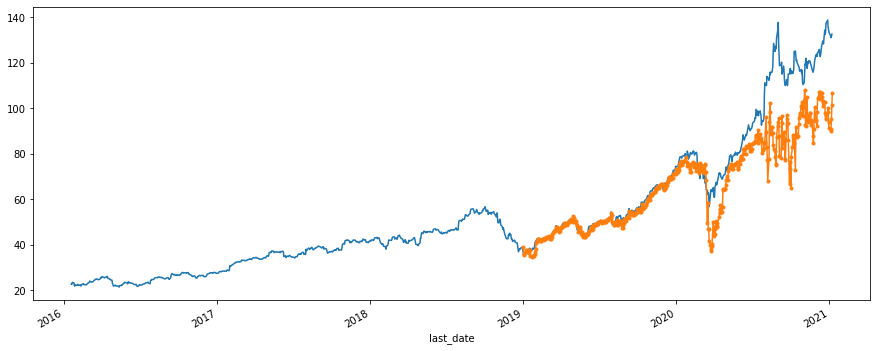

In [25]:
plt.figure(figsize=(15, 6))

y.plot(ax=plt.gca())
y_pred.plot(ax=plt.gca(), legend=None, marker=".")